In [70]:
import hdmpy
import patsy
import warnings
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator

warnings.simplefilter('ignore')

In [69]:
# !pip install multiprocess
# !pip install pyreadr
# !git clone https://github.com/maxhuppertz/hdmpy.git

  Using cached pyreadr-0.4.7-cp39-cp39-macosx_10_9_x86_64.whl (253 kB)
Cloning into 'hdmpy'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 70 (delta 39), reused 52 (delta 21), pack-reused 0
Receiving objects: 100% (70/70), 25.30 KiB | 1.01 MiB/s, done.
Resolving deltas: 100% (39/39), done.


# Assignment-1

## 1-a

In [2]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
data = pd.read_csv(file)

In [3]:
data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,11.057692,2.403126,0,0,1,0,0,0,0,0,0,1,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,13.942308,2.634928,1,0,0,0,0,1,0,0,0,1,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,14.769231,2.692546,0,0,0,0,1,0,0,0,1,0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,23.076923,3.138833,1,0,0,1,0,0,0,0,1,0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,38.461538,3.649659,0,0,0,0,0,1,0,0,1,0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32.967033,3.495508,0,0,1,0,0,0,0,0,1,0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


### Unconditional wage gap due to college education

In [4]:
data[data["clg"] == 1]["lwage"].mean() - data[data["clg"] == 0]["lwage"].mean()

0.23871669071457058

In [5]:
cl = smf.ols("np.log(wage) ~ clg", data)
cl_results = cl.fit(cov_type="HC1")
cl_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     217.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.11e-48
Time:                        19:24:47   Log-Likelihood:                -4315.9
No. Observations:                5150   AIC:                             8636.
Df Residuals:                    5148   BIC:                             8649.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8950      0.010    298.327      0.000       2.876       2.914
clg            0.2387      0.016     14.746      0.000       0.207       0.270
==============================================================================
Omnibus:                      320.661   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.806
Skew:                           0.446   Prob(JB):                    7.00e-135
Kurtosis:                       4.443   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

#### The unconditional wage gap (in log-wage units) between those with college education and without is 0.2387

### Basic Control

In [6]:
### Controls
## sex, mw, so, we, exp1, exp2, exp3, exp4, and one hot encodings of occ2 and ind2

In [7]:
basic_control = smf.ols("np.log(wage) ~ clg + (sex+mw+so+we+exp1+exp2+exp3+exp4+C(occ2)+C(ind2))",
              data)
basic_control_results = basic_control.fit(cov_type="HC1")
basic_control_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     40.30
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:24:58   Log-Likelihood:                -3631.3
No. Observations:                5150   AIC:                             7365.
Df Residuals:                    5099   BIC:                             7699.
Df Model:                          50                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4508      0.100     34.447      0.000       3.254       3.647
C(occ2)[T.2]     -0.0616      0.037     -1.671      0.095      -0.134       0.011
C(occ2)[T.3]     -0.0143      0.040     -0.357      0.721      -0.093       0.064
C(occ2)[T.4]     -0.0849      0.049     -1.741      0.082      -0.181       0.011
C(occ2)[T.5]     -0.0803      0.061     -1.318      0.187      -0.200       0.039
C(occ2)[T.6]     -0.3605      0.046     -7.860      0.000      -0.450      -0.271
C(occ2)[T.7]      0.1203      0.075      1.604      0.109      -0.027       0.267
C(occ2)[T.8]     -0.3444      0.043     -8.074      0.000      -0.428      -0.261
C(occ2)[T.9]     -0.2510      0.051     -4.909      0.000      -0.351      -0.151
C(occ2)[T.10]     0.0279      0.046      0.606      0.544      -0.062       0.118
C(occ2)[T.11]    -0.5689      0.050    -11.392      0.000      -0.667      -0.471
C(occ2)[T.12]    -0.3894      0.062     -6.309      0.000      -0.510      -0.268
C(occ2)[T.13]    -0.4295      0.044     -9.664      0.000      -0.517      -0.342
C(occ2)[T.14]    -0.6299      0.045    -13.884      0.000      -0.719      -0.541
C(occ2)[T.15]    -0.5572      0.051    -10.890      0.000      -0.657      -0.457
C(occ2)[T.16]    -0.2792      0.037     -7.454      0.000      -0.353      -0.206
C(occ2)[T.17]    -0.4876      0.028    -17.511      0.000      -0.542      -0.433
C(occ2)[T.18]    -0.4185      0.187     -2.243      0.025      -0.784      -0.053
C(occ2)[T.19]    -0.3635      0.048     -7.641      0.000      -0.457      -0.270
C(occ2)[T.20]    -0.3208      0.043     -7.522      0.000      -0.404      -0.237
C(occ2)[T.21]    -0.3980      0.038    -10.458      0.000      -0.473      -0.323
C(occ2)[T.22]    -0.5406      0.041    -13.128      0.000      -0.621      -0.460
C(ind2)[T.3]     -0.1259      0.115     -1.098      0.272      -0.351       0.099
C(ind2)[T.4]     -0.2528      0.094     -2.686      0.007      -0.437      -0.068
C(ind2)[T.5]     -0.2466      0.097     -2.534      0.011      -0.437      -0.056
C(ind2)[T.6]     -0.2570      0.095     -2.713      0.007      -0.443      -0.071
C(ind2)[T.7]     -0.1724      0.115     -1.499      0.134      -0.398       0.053
C(ind2)[T.8]     -0.2064      0.111     -1.862      0.063      -0.424       0.011
C(ind2)[T.9]     -0.4033      0.095     -4.264      0.000      -0.589      -0.218
C(ind2)[T.10]    -0.1821      0.100     -1.825      0.068      -0.378       0.013
C(ind2)[T.11]    -0.1250      0.102     -1.222      0.222      -0.325       0.076
C(ind2)[T.12]    -0.0517      0.096     -0.537      0.591      -0.240       0.137
C(ind2)[T.13]    -0.1712      0.103     -1.665      0.096      -0.373       0.030
C(ind2)[T.14]    -0.1475      0.095     -1.554      0.120      -0.334       0.039
C(ind2)[T.15]    -0.3438      0.145     -2.369   

In [8]:
APE, std_err = basic_control_results.params["clg"], basic_control_results.HC1_se["clg"]
ci = [APE-1.96*std_err, APE+1.96*std_err]

In [9]:
print(f'The Average Predictive Effect is {APE}')
print(f'The 95% Confidence Interval for APE is {ci}')

The Average Predictive Effect is 0.13285534860067444
The 95% Confidence Interval for APE is [0.10068811250358381, 0.16502258469776507]


### Flexible controls (pairwise interactions) - OLS

In [10]:
flex = smf.ols("np.log(wage) ~ (clg+sex+mw+so+we+exp1+exp2+exp3+exp4+C(occ2)+C(ind2))**2",
              data)
flex_results = flex.fit(cov_type="HC1")
flex_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     3453.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:25:36   Log-Likelihood:                -3097.1
No. Observations:                5150   AIC:                             7590.
Df Residuals:                    4452   BIC:                         1.216e+04
Df Model:                         697                                         
Covariance Type:                  HC1                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.3675      0.753      3.143      0.002       0.891       3.844
C(occ2)[T.2]                   -0.3844      0.456     -0.843      0.399      -1.279       0.510
C(occ2)[T.3]                    0.1908      0.184      1.036      0.300      -0.170       0.552
C(occ2)[T.4]                   -0.1286      0.619     -0.208      0.836      -1.342       1.085
C(occ2)[T.5]                   -0.4786      0.515     -0.929      0.353      -1.489       0.532
C(occ2)[T.6]                   -0.1590      0.175     -0.909      0.364      -0.502       0.184
C(occ2)[T.7]                   -0.7527      0.449     -1.676      0.094      -1.633       0.128
C(occ2)[T.8]                   -0.4308      0.177     -2.439      0.015      -0.777      -0.085
C(occ2)[T.9]                   -0.9149      0.486     -1.884      0.060      -1.867       0.037
C(occ2)[T.10]                  -0.9742      0.533     -1.827      0.068      -2.019       0.071
C(occ2)[T.11]                  -0.6663      0.239     -2.787      0.005      -1.135      -0.198
C(occ2)[T.12]                  -0.1707      0.376     -0.454      0.650      -0.907       0.566
C(occ2)[T.13]                  -0.6721      0.299     -2.250      0.024      -1.258      -0.087
C(occ2)[T.14]                   0.1398      0.330      0.423      0.672      -0.507       0.787
C(occ2)[T.15]                   0.0393      0.260      0.151      0.880      -0.470       0.548
C(occ2)[T.16]                  -0.1651      0.457     -0.361      0.718      -1.062       0.731
C(occ2)[T.17]                  -0.6268      0.481     -1.304      0.192      -1.569       0.315
C(occ2)[T.18]               -9.757e-05      0.030     -0.003      0.997      -0.058       0.058
C(occ2)[T.19]                  -0.2002      0.539     -0.372      0.710      -1.256       0.855
C(occ2)[T.20]                   0.0702      0.573      0.122      0.903      -1.054       1.194
C(occ2)[T.21]                  -1.0733      0.634     -1.693      0.090      -2.316       0.169
C(occ2)[T.22]                  -0.8769      0.570     -1.538      0.124      -1.995       0.241
C(ind2)[T.3]                   -0.3716      0.909     -0.409      0.683      -2.154       1.411
C(ind2)[T.4]                    1.2115      0.756      1.602      0.109      -0.270       2.693
C(ind2)[T.5]                    0.6525      0.765      0.853      0.394      -0.846       2.151
C(ind2)[T.6]                    0.5580      0.756      0.738      0.460      -0.924       2.039
C(ind2)[T.7]                    1.0308      0.909      1.134      0.257      -0.751       2.813
C(ind2)[T.8]                    0.6899      0.769      0.897      0.370      -0.817       2.197
C(ind2)[T.9]                    0.6552      0.762      0.860      0.390      -0.838       2.148
C(ind2)[T.1

In [11]:
print(f'Average Predictive Effect from OLS is {flex_results.params[flex.exog_names.index("clg")]}')
print(f'Std Error of APE is {flex_results.HC1_se[flex.exog_names.index("clg")]}')

Average Predictive Effect from OLS is 0.6402715335143685
Std Error of APE is 0.19981935328215403


### double LASSO

In [4]:
y = np.log(data['wage']).values
Z = data.drop(['wage', 'lwage'], axis=1)
Z.columns

Index(['sex', 'shs', 'hsg', 'scl', 'clg', 'ad', 'mw', 'so', 'we', 'ne', 'exp1',
       'exp2', 'exp3', 'exp4', 'occ', 'occ2', 'ind', 'ind2'],
      dtype='object')

In [204]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
lasso_model = lambda: make_pipeline(StandardScaler(), LassoCV(cv=cv))

def double_lasso(y, D, W):
    yres = y - lasso_model().fit(W, y).predict(W)
    Dres = D - lasso_model().fit(W, D).predict(W)
    hat = np.mean(yres * Dres) / np.mean(Dres**2)
    epsilon = yres - hat * Dres
    V = np.mean(epsilon**2 * Dres**2) / np.mean(Dres**2)**2
    return hat, np.sqrt(V / y.shape[0])

Zcontrols = patsy.dmatrix('0 + (clg+sex+mw+so+we+exp1+exp2+exp3+exp4+C(occ2)+C(ind2))**2',
                           Z, return_type='dataframe')

Zcontrols = Zcontrols - Zcontrols.mean(axis=0)
W = Zcontrols.drop('clg', axis=1)
D = Zcontrols['clg']

hat, stderr = double_lasso(y, D, W)

In [106]:
print(f'The mean predictive effect from double LASSO is {hat}')
print(f'The std error from double LASSO is {stderr}')


The mean predictive effect from double LASSO is 0.5287349828233784
The std error from double LASSO is 0.16568440079351474


## 1-b (Heterogeneity)

In [16]:
## [1, sex, mw, so, we, exp1, exp2, exp3, exp4]

### Class approach to dataset creation

In [5]:
Zcontrols = patsy.dmatrix('0 + (sex+mw+so+we+exp1+exp2+exp3+exp4+C(occ2)+C(ind2))**2',
                           Z, return_type='dataframe')

Zcontrols = Zcontrols - Zcontrols.mean(axis=0)

In [6]:
Zhet = patsy.dmatrix('0 + (sex+mw+so+we+exp1+exp2+exp3+exp4)',
                      Z, return_type='dataframe')
Zhet = Zhet - Zhet.mean(axis=0)

In [7]:
Zhet['clg'] = Z['clg']
Zinteractions = patsy.dmatrix('0 + clg + clg * (sex+mw+so+we+exp1+exp2+exp3+exp4)',
                               Zhet, return_type='dataframe')

In [21]:
X = pd.concat([Zinteractions, Zcontrols], axis=1)
X = X.loc[:,~X.columns.duplicated()] ### remove duplicate columns

In [22]:
interaction_cols = [c for c in X.columns if c.startswith('clg')]
interaction_cols

['clg',
 'clg:sex',
 'clg:mw',
 'clg:so',
 'clg:we',
 'clg:exp1',
 'clg:exp2',
 'clg:exp3',
 'clg:exp4']

### Linear Regression

In [23]:
lin_reg_sk = LinearRegression().fit(X, y.reshape(-1,1))

In [24]:
results = pd.DataFrame(zip(X.columns, lin_reg_sk.coef_[0]), columns=["features", "coeffs"])
results[results["features"].str.contains("clg")]

,features,coeffs
0,clg,0.117377
9,clg:sex,0.017932
10,clg:mw,0.018625
11,clg:so,-0.013975
12,clg:we,-0.063808
13,clg:exp1,0.065278
14,clg:exp2,-0.636869
15,clg:exp3,0.235067
16,clg:exp4,-0.028674


### LassoCV

In [100]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
lasso_cv = make_pipeline(StandardScaler(), LassoCV(cv=cv))

In [26]:
lasso_cv.fit(X, y.reshape(-1,1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(cv=KFold(n_splits=5, random_state=123, shuffle=True)))])

In [27]:
results = pd.DataFrame(zip(X.columns, lasso_cv[-1].coef_), columns=["features", "coeffs"])
results[results["features"].str.contains("clg")]

,features,coeffs
0,clg,0.060344
9,clg:sex,-0.000000
10,clg:mw,0.000000
11,clg:so,0.000000
12,clg:we,-0.004723
13,clg:exp1,0.000000
14,clg:exp2,0.000000
15,clg:exp3,-0.000000
16,clg:exp4,-0.000000


### LASSO without Standard Scaling

In [28]:
lcv = LassoCV(cv=cv).fit(X, y.reshape(-1,1))

In [30]:
results = pd.DataFrame(zip(X.columns, lcv.coef_), columns=["features", "coeffs"])
results[results["features"].str.contains("clg")]

,features,coeffs
0,clg,0.011966
9,clg:sex,-0.000000
10,clg:mw,0.000000
11,clg:so,0.000000
12,clg:we,-0.000000
13,clg:exp1,-0.000000
14,clg:exp2,-0.000000
15,clg:exp3,-0.000000
16,clg:exp4,-0.001034


### RidgeCV

In [33]:
ridge_cv = make_pipeline(StandardScaler(), RidgeCV(cv=cv))

In [35]:
ridge_cv.fit(X, y.reshape(-1,1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                         cv=KFold(n_splits=5, random_state=123, shuffle=True)))])

In [42]:
results = pd.DataFrame(zip(X.columns, ridge_cv[-1].coef_[0]), columns=["features", "coeffs"])
results[results["features"].str.contains("clg")]

,features,coeffs
0,clg,0.058906
9,clg:sex,0.004077
10,clg:mw,0.009520
11,clg:so,0.000473
12,clg:we,-0.013079
13,clg:exp1,0.044409
14,clg:exp2,-0.039310
15,clg:exp3,-0.011204
16,clg:exp4,0.016732


### ElasticNetCV

In [49]:
elastic_cv = make_pipeline(StandardScaler(), ElasticNetCV(cv=cv))

In [50]:
elastic_cv.fit(X, y.reshape(-1,1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=123, shuffle=True)))])

In [64]:
results = pd.DataFrame(zip(X.columns, elastic_cv[-1].coef_[:,]), columns=["features", "coeffs"])
results[results["features"].str.contains("clg")]

,features,coeffs
0,clg,0.059999
9,clg:sex,-0.000000
10,clg:mw,0.000000
11,clg:so,0.000000
12,clg:we,-0.004654
13,clg:exp1,0.000145
14,clg:exp2,0.000000
15,clg:exp3,-0.000000
16,clg:exp4,-0.000000


### RLasso

In [67]:
class RLasso(BaseEstimator):
    
    def __init__(self, *, post=False):
        self.post = post

    def fit(self, X, y):
        self.rlasso_ = hdmpy.rlasso(X, y, post=self.post)
        return self

    @property
    def coef_(self):
        return np.array(self.rlasso_.est['beta']).flatten()

    def predict(self, X):
        return X @ self.coef_ + np.array(self.rlasso_.est['intercept'])

In [96]:
rlasso = RLasso().fit(X, y.reshape(-1,1))

In [97]:
rlasso.coef_

array([ 1.27334450e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.21240208e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.46161546e-01,  1.81060432e-01,  2.30089482e-01,
        1.43275329e-01,  5.40363559e-02,  0.00000000e+00,  2.64834392e-01,
        0.00000000e+00,  0.00000000e+00,  1.98905075e-01, -2.34003677e-01,
        0.00000000e+00, -2.29850694e-02, -1.16663944e-01, -2.25618551e-01,
        0.00000000e+00, -1.68259281e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.73078877e-02, -1.49547556e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -6.13987139e-02,  0.00000000e+00,  1.74318840e-02,
        1.36155220e-01,  0.00000000e+00,  7.44564688e-02,  0.00000000e+00,
        0.00000000e+00,  

In [98]:
results = pd.DataFrame(zip(X.columns, rlasso.coef_[:,]), columns=["features", "coeffs"])
results[results["features"].str.contains("clg")]

,features,coeffs
0,clg,0.127334
9,clg:sex,0.000000
10,clg:mw,0.000000
11,clg:so,0.000000
12,clg:we,0.000000
13,clg:exp1,0.000000
14,clg:exp2,0.000000
15,clg:exp3,0.000000
16,clg:exp4,0.000000


## 1-c

In [101]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
lasso_model = lambda: make_pipeline(StandardScaler(), LassoCV(cv=cv))

alpha = {}
res_y, res_D, epsilon = {}, {}, {}
for c in interaction_cols:
    print(f"Double Lasso for target variable {c}")
    D = X[c].values
    W = X.drop([c], axis=1)
    res_y[c] = y - lasso_model().fit(W, y).predict(W)
    res_D[c] = D - lasso_model().fit(W, D).predict(W)
    final = LinearRegression(fit_intercept=False).fit(res_D[c].reshape(-1, 1), res_y[c])
    epsilon[c] = res_y[c] - final.predict(res_D[c].reshape(-1, 1))
    alpha[c] = [final.coef_[0]]

Double Lasso for target variable clg
Double Lasso for target variable clg:sex
Double Lasso for target variable clg:mw
Double Lasso for target variable clg:so
Double Lasso for target variable clg:we
Double Lasso for target variable clg:exp1
Double Lasso for target variable clg:exp2
Double Lasso for target variable clg:exp3
Double Lasso for target variable clg:exp4


In [106]:
pd.DataFrame.from_dict(alpha, orient='index', columns=["coeffs"])

,coeffs
clg,0.136170
clg:sex,0.004204
clg:mw,0.042637
clg:so,0.004920
clg:we,-0.074034
clg:exp1,0.012827
clg:exp2,0.053326
clg:exp3,0.001427
clg:exp4,-0.003301


In [ ]:
## Compare to LassoCV. Whats the difference and why?

## 1-d

### Covariance matrix of coefficients

In [107]:
V = np.zeros((len(interaction_cols), len(interaction_cols)))
for it, c in enumerate(interaction_cols):
    Jc = np.mean(res_D[c]**2)
    for itp, cp in enumerate(interaction_cols):
        Jcp = np.mean(res_D[cp]**2)
        Sigma = np.mean(res_D[c] * epsilon[c] * epsilon[cp] * res_D[cp])
        V[it, itp] = Sigma / (Jc * Jcp)

### DIagonal of Covariance matrix

In [114]:
np.diag(V)

array([ 1.33371298,  5.02544417, 11.66389889,  9.57363042, 10.2949148 ,
        0.65317274, 60.49510859, 16.3078642 ,  0.18665819])

### Std Error of coefficients

In [111]:
n = X.shape[0]
for it, c in enumerate(interaction_cols):
    alpha[c] += [np.sqrt(V[it, it] / n)]
df = pd.DataFrame.from_dict(alpha, orient='index', columns=['point', 'stderr'])
df

,point,stderr
clg,0.136170,0.016093
clg:sex,0.004204,0.031238
clg:mw,0.042637,0.047590
clg:so,0.004920,0.043116
clg:we,-0.074034,0.044710
clg:exp1,0.012827,0.011262
clg:exp2,0.053326,0.108382
clg:exp3,0.001427,0.056272
clg:exp4,-0.003301,0.006020


In [115]:
Drootinv = np.diagflat(1/np.sqrt(np.diag(V)))
scaledCov = Drootinv @ V @ Drootinv

np.random.seed(123)
U = np.random.multivariate_normal(np.zeros(scaledCov.shape[0]), scaledCov, size=10000)
z = np.max(np.abs(U), axis=1)
c = np.percentile(z, 95)
c

2.736351291406547

# Assignment-2

## 2-a

In [300]:

sample_sizes = [50, 150, 250, 350, 450, 550, 650, 750]
d = 10 
p = 0.2  
delta = 1 
base =0.3

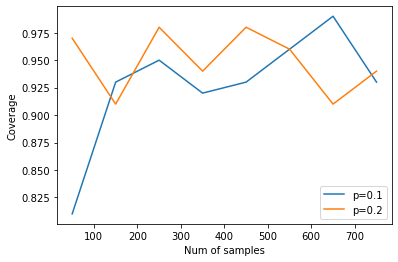

In [256]:
np.random.seed(42)

# A simple experimental data generating process
def gen_data(n, d, p, delta, base):
    D = np.random.binomial(1, p, size=(n,))
    X = np.random.normal(0, 1, size=(n, d))
    y0 = base - X[:, 0] + np.random.normal(0, 1, size=(n,))
    y1 = delta + base - X[:, 0] + np.random.normal(0, 1, size=(n,))
    y = y1 * D + y0 * (1 - D)
    return y, D, X

def twomeans(y, D):
    hat0 = np.mean(y[D==0]) # mean of outcome of un-treated
    hat1 = np.mean(y[D==1]) # mean of outcome of treated
    V0 = np.var(y[D==0]) / np.mean(1 - D) # asymptotic variance of the mean of outcome of untreated
    V1 = np.var(y[D==1]) / np.mean(D) # asymptotic variance of the mean of outcome of treated
    return hat0, hat1, V0, V1

def get_coverage(sample_sizes, d, p, delta, base, trials):
    coverage = {}
    for sample_size in sample_sizes:
        cov = []
        for _ in range(trials):
            y, D, X = gen_data(sample_size, d, p, delta, base)
            hat0, hat1, V0, V1 = twomeans(y, D)
            hat = hat1 - hat0
            stderr = np.sqrt((V0 + V1) / sample_size)
            ci = [hat - 1.96 * stderr, hat + 1.96 * stderr]
            cov += [(ci[0] <= delta) & (delta <= ci[1])] 
        coverage[sample_size] = np.mean(cov)
    return coverage


for prob in [0.1, 0.2]:
    coverage = get_coverage(p=prob, sample_sizes=sample_sizes, d=d, delta=delta, base=base, trials=100)
    lists = sorted(coverage.items()) 
    x, y = zip(*lists) 
    plt.plot(x, y, label = f'p={prob}')
    plt.xlabel("Num of samples")
    plt.ylabel("Coverage")
    plt.legend()
plt.show()

## 2-b

In [459]:
y, D, X = gen_data(sample_size, d, p, delta, base)
X = X-X.mean(axis=0)
df = pd.DataFrame(X, columns=[f'x_{t}' for t in range(X.shape[1])])
df['D'] = D
df['base'] = base

In [460]:
ols = sm.OLS(y, df).fit(cov_type='HC1')

In [461]:
ols.conf_int(alpha = 0.05)


,0,1
x_0,-1.161810,-1.020085
x_1,-0.083025,0.055673
x_2,-0.135596,-0.008273
x_3,-0.044074,0.093328
x_4,-0.117772,0.016648
x_5,-0.007087,0.132827
x_6,-0.071331,0.063585
x_7,-0.051471,0.080745
x_8,-0.039571,0.106113
x_9,-0.080314,0.058077


In [463]:
ols.params

x_0    -1.090947
x_1    -0.013676
x_2    -0.071935
x_3     0.024627
x_4    -0.050562
x_5     0.062870
x_6    -0.003873
x_7     0.014637
x_8     0.033271
x_9    -0.011119
D       0.974148
base    1.006392
dtype: float64

In [464]:
ols.bse['D']

0.08184159912471323

In [465]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     92.76
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          4.54e-131
Time:                        22:18:08   Log-Likelihood:                -1031.5
No. Observations:                 750   AIC:                             2087.
Df Residuals:                     738   BIC:                             2143.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x_0           -1.0909      0.036    -30.174      0.000      -1.162      -1.020
x_1           -0.0137      0.035     -0.387      0.699      -0.083       0.056
x_2           -0.0719      0.032     -2.215      0.027      -0.136      -0.008
x_3            0.0246      0.035      0.703      0.482      -0.044       0.093
x_4           -0.0506      0.034     -1.474      0.140      -0.118       0.017
x_5            0.0629      0.036      1.761      0.078      -0.007       0.133
x_6           -0.0039      0.034     -0.113      0.910      -0.071       0.064
x_7            0.0146      0.034      0.434      0.664      -0.051       0.081
x_8            0.0333      0.037      0.895      0.371      -0.040       0.106
x_9           -0.0111      0.035     -0.315      0.753      -0.080       0.058
D              0.9741      0.082     11.903      0.000       0.814       1.135
base           1.0064      0.135      7.429      0.000       0.741       1.272
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.715
Skew:                          -0.001   Prob(JB):                        0.699
Kurtosis:                       2.849   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [306]:
# We implement the partialling out version of OLS (for pedagogical purposes)
def partialling_out(y, D, W):
    yres = y - LinearRegression().fit(W, y).predict(W) # residualize outcome with OLS
    Dres = D - LinearRegression().fit(W, D).predict(W) # residualize treatment with OLS
    hat = np.mean(yres * Dres) / np.mean(Dres**2) # calculate final residual ~ residual ols estimate
    epsilon = yres - hat * Dres # calculate residual of final regression; epsilon in the BLP decomposition
    V = np.mean(epsilon**2 * Dres**2) / np.mean(Dres**2)**2 # calculate variance of effect
    return hat, np.sqrt(V / y.shape[0])

In [307]:
hat, std_err = partialling_out(y, D, X)

In [308]:
hat, std_err

(0.951216309587453, 0.08811074608959717)

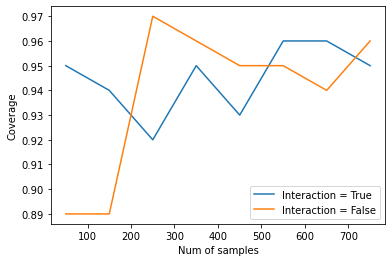

In [458]:
np.random.seed(42)
p = 0.2
def get_coverage_OLS(sample_sizes, d, p, delta, base, trials, interaction):
    coverage = {}
    for sample_size in sample_sizes:
        cov = []
        hats = []
        for _ in range(trials):
            y, D, X = gen_data(sample_size, d, p, delta, base)
            X = X-X.mean(axis=0)
            df = pd.DataFrame(X, columns=[f'x_{t}' for t in range(X.shape[1])])
            df['D'] = D
            df['base'] = base
            ols = sm.OLS(y, df).fit(cov_type='HC1')
            hat, stderr = ols.params["D"], ols.bse["D"]
#             if not interaction: 
#                 hat, stderr = partialling_out(y, D, X)
#             else:
#                 hat, stderr = partialling_out(y, D, np.hstack([D.reshape(-1,1)*X, X]))
            ci = [hat - 1.96 * stderr, hat + 1.96 * stderr]
            cov += [(ci[0] <= delta) & (delta <= ci[1])] 
            hats.append(hat)
        coverage[sample_size] = np.mean(cov)
    return coverage 


interactions = [True, False]

for interaction in interactions:

    coverage = get_coverage_OLS(p=p, sample_sizes=sample_sizes, d=d, delta=delta, base=base, trials=100, interaction=interaction)
    lists = sorted(coverage.items()) 
    x, y = zip(*lists) 
    plt.plot(x, y, label = f'Interaction = {interaction}')
    plt.xlabel("Num of samples")
    plt.ylabel("Coverage")
    plt.legend()

In [454]:
hats

NameError: name 'hats' is not defined

## 2-c

In [353]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
lasso_model = lambda: make_pipeline(StandardScaler(), LassoCV(cv=cv))

def double_lasso(y, D, W):
    yres = y - lasso_model().fit(W, y).predict(W)
    Dres = D - lasso_model().fit(W, D).predict(W)
    hat = np.mean(yres * Dres) / np.mean(Dres**2)
    epsilon = yres - hat * Dres
    V = np.mean(epsilon**2 * Dres**2) / np.mean(Dres**2)**2
    return hat, np.sqrt(V / y.shape[0])
    

In [366]:
y, D, X = gen_data(sample_size, d, p, delta, base)
X = X-X.mean(axis=0)
hat, std_err = double_lasso(y, D, X)
hat, std_err

(0.9621493153698449, 0.0923414636246967)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009980105258783567, tolerance: 0.007645238432841102
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0635556019133503, tolerance: 0.007645238432841102
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09911005806426232, tolerance: 0.007645238432841102
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_des

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021040922389898173, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019900823931091077, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018801170975579734, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Obj

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024774332025600643, tolerance: 0.009791468119420355
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06345971770203818, tolerance: 0.009791468119420355
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027732065074310697, tolerance: 0.009791468119420355
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_d

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009190007244856274, tolerance: 0.0006975000000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008489542202003153, tolerance: 0.0006975000000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007846856541284669, tolerance: 0.0006975000000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coord

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008137950548237349, tolerance: 0.0006975
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007703679787982587, tolerance: 0.0006975
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007225009139683047, tolerance: 0.0006975
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWar

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008471545682846582, tolerance: 0.0006975000000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007011704258734763, tolerance: 0.0006975000000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008096254803467429, tolerance: 0.0006975000000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordin

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01334106670980617, tolerance: 0.008464433168605451
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015264170322609516, tolerance: 0.008464433168605451
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014557043602536623, tolerance: 0.008464433168605451
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_d

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01210428697181629, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011337280002184535, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010615611330661752, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Obje

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01888238158015554, tolerance: 0.009798122894476279
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01634627127836552, tolerance: 0.009798122894476279
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03691955025634286, tolerance: 0.009798122894476279
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_des

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001342062389518641, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001838551291017211, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020072098836369894, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Ob

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0074934620177629085, tolerance: 0.006495442860275772
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011216253796128228, tolerance: 0.006495442860275772
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011005962906992295, tolerance: 0.006495442860275772
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013724310290502473, tolerance: 0.011026370853999169
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04847780147404279, tolerance: 0.011026370853999169
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07112502308505242, tolerance: 0.011026370853999169
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_de

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01923312616134787, tolerance: 0.006612823037517224
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043808358896505695, tolerance: 0.006612823037517224
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048693209572421736, tolerance: 0.006612823037517224
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_d

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011378094288978957, tolerance: 0.007247461775988252
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13799365190717694, tolerance: 0.007247461775988252
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44188957182880984, tolerance: 0.007247461775988252
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_de

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001122575234477563, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001337494536023387, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013635274214240378, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Ob

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013759036261511426, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015537217589366437, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000922221642223553, tolerance: 0.00075
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: O

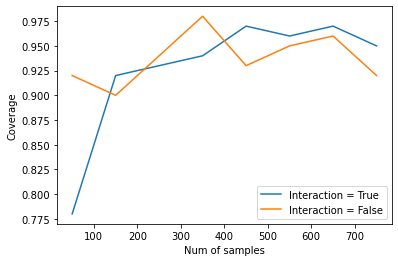

In [368]:
np.random.seed(42)
p = 0.2
def get_coverage_LASSO(sample_sizes, d, p, delta, base, trials, interaction):
    coverage = {}
    for sample_size in sample_sizes:
        cov = []
        for _ in range(trials):
            y, D, X = gen_data(sample_size, d, p, delta, base)
            X = X-X.mean(axis=0)
            if not interaction: 
                hat, stderr = double_lasso(y, D, X)
            else:
                hat, stderr = double_lasso(y, D, np.hstack([D.reshape(-1,1)*X, X]))
            ci = [hat - 1.96 * stderr, hat + 1.96 * stderr]
            cov += [(ci[0] <= delta) & (delta <= ci[1])] 
        coverage[sample_size] = np.mean(cov)
    return coverage


interactions = [True, False]

for interaction in interactions:

    coverage = get_coverage_LASSO(p=p, sample_sizes=sample_sizes, d=d, delta=delta, base=base, trials=100, interaction=interaction)
    lists = sorted(coverage.items()) 
    x, y = zip(*lists) 
    plt.plot(x, y, label = f'Interaction = {interaction}')
    plt.xlabel("Num of samples")
    plt.ylabel("Coverage")
    plt.legend()